In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
data=pd.read_csv('gld_price_data.csv')

In [3]:
data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
data.shape

(2290, 6)

In [6]:
data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation=data.corr()

<AxesSubplot:>

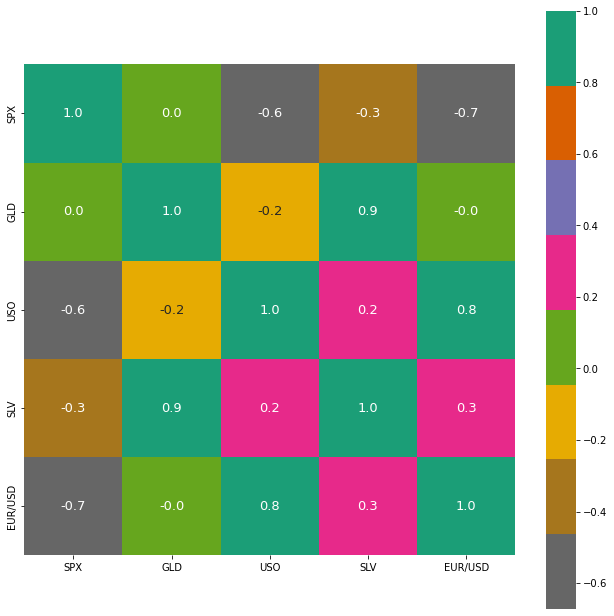

In [10]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (11,11))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':13}, cmap='Dark2_r')

In [11]:
# correlation values of GLD
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

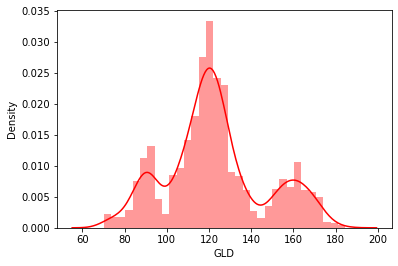

In [12]:
# checking the distribution of the GLD Price
sns.distplot(data['GLD'],color='red')

In [13]:
#Splitting the Features and Target
X=data.drop(['Date','GLD'],axis=1)
y=data['GLD']

In [14]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [15]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=2)

In [21]:
regressor = RandomForestRegressor(n_estimators=100)

In [22]:
regressor.fit(X_train,y_train)

RandomForestRegressor()

In [23]:
test_data_prediction = regressor.predict(X_test)

In [24]:
print(test_data_prediction)

[168.58459918  81.68109999 116.18110019 127.52330086 120.53790154
 154.56479748 150.68739844 126.07110022 117.7311991  126.00440034
 116.20260084 171.63950074 141.58870003 167.64889886 115.17309982
 117.82860056 137.59350342 170.18030108 159.96210247 160.56620001
 155.24700052 125.5142001  175.75790021 157.12830353 125.06450039
  93.97359928  77.08450012 119.77959986 119.26690077 167.2928996
  88.24209973 125.44610159  91.14310047 117.74410029 121.06629924
 136.23720116 115.52260107 115.17730067 149.01399995 107.39750122
 103.85820191  87.03099791 126.66230033 118.00589906 153.18909929
 119.96609987 108.23760076 107.93409846  93.17269982 127.42179694
  74.66740051 113.6084992  121.19680048 111.199899   118.85599895
 119.91559939 158.15460093 168.43640154 147.02079711  85.74609882
  94.03320007  86.80549858  90.48249977 118.93980097 126.37770057
 127.6432997  169.23180061 122.22369953 117.43909908  98.62840062
 168.23660156 143.02129831 132.15250187 121.33650215 122.00609936
 119.879800

In [25]:
# R squared error
error_score = metrics.r2_score(y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9890488717425885


In [26]:
Y_test = list(y_test)

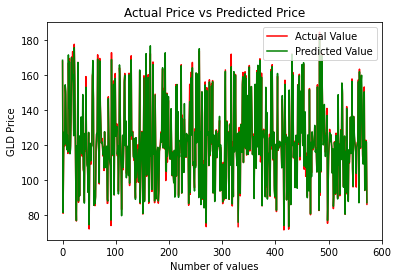

In [27]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [28]:
import pickle

In [31]:
pickle.dump(data,open(' RandomForest_Regression.pkl','wb'))